In [87]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(data, labels, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='UMAP projection', random_state=42):
    """
    Draw UMAP of a 3-channel signal dataset with separate colors for each class.

    Args:
    data: numpy array, the dataset to be visualized with shape (number_of_samples, channels, length)
    labels: numpy array, class labels corresponding to each data point
    n_neighbors: int, optional, default: 15, number of neighbors to consider for each point in UMAP
    min_dist: float, optional, default: 0.1, minimum distance between points in the low-dimensional representation
    n_components: int, optional, default: 2, number of dimensions in the low-dimensional representation
    metric: str, optional, default: 'euclidean', distance metric to use for UMAP
    title: str, optional, default: 'UMAP projection', title of the plot
    """

    # Reshape the data by concatenating channels along columns
    number_of_samples, channels, length = data.shape
    reshaped_data = data.reshape(number_of_samples, channels * length)

    # Perform UMAP dimensionality reduction
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=metric, random_state=random_state)
    embedding = reducer.fit_transform(reshaped_data)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette=sns.color_palette("hls", len(np.unique(labels))), edgecolor='k', s=100, ax=ax)

    # Set plot title and labels
    # ax.set_title(title, fontsize=18)
    ax.set_xlabel('UMAP 1', fontsize=14)
    ax.set_ylabel('UMAP 2', fontsize=14)
    
    plt.savefig(f'./{title}.pdf')
    # Show the plot
    plt.show()

In [90]:
import datasets
data_path = '/home/x_l30/Research/datasets/UniMiB/UniMiB-SHAR/data'
unimib = datasets.unimib_dataLoader(path_in = data_path, single_class = False)

x_train shape is (6055, 3, 144), x_test shape is (1524, 3, 144)
y_train shape is (6055,), y_test shape is (1524,)
StandingUpFS label is 0 has 119 train smaples, 34 test samples, 
                     StandingUpFL label is 1 has 169 train smaples, 47 test samples, 
                     Walking label is 2 has 1394 train smaples, 344 test samples, 
                     Running label is 3 has 1572 train smaples, 413 test samples, 
                     GoingUS label is 4 has 737 train smaples, 184 test samples, 
                     Jumping label is 5 has 600 train smaples, 146 test samples, 
                     GoingDownS label is 6 has 1068 train smaples, 256 test samples, 
                     LyingDownFS label is 7 has 228 train smaples, 68 test samples, 
                     SittingDown label is 8 has 168 train smaples, 32 test samples 



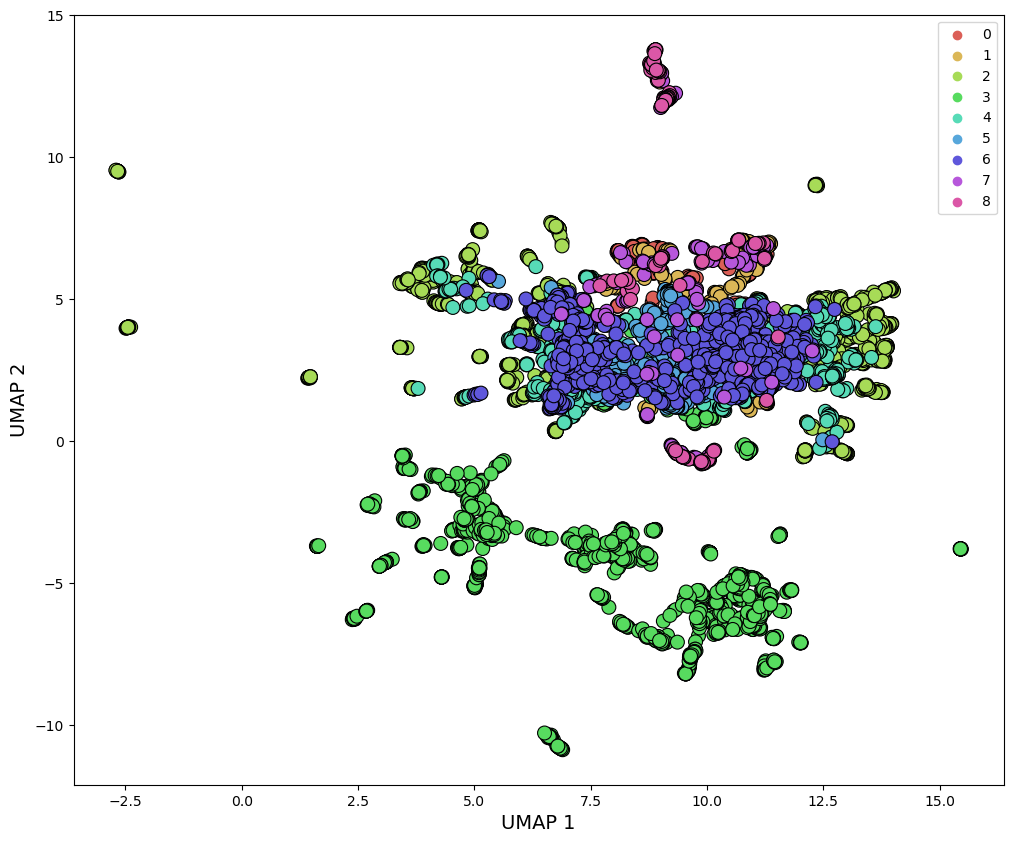

In [91]:
draw_umap(unimib.x_train, unimib.y_train, title='Real UniMiB UMAP Projection')

In [55]:
!pip install importlib

  Preparing metadata (setup.py) ... done
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5852 sha256=f7b168802a71bb5f44eb30663725af10a8aa07850ef7cceb4b6d69d55883aac1
  Stored in directory: /home/x_l30/.cache/pip/wheels/98/57/8f/62ce43e7a5f971cf15686e238761c65fca7be5b86e0caf0dee
Successfully built importlib


In [56]:
import importlib
import visualization

In [76]:
importlib.reload(visualization)

<module 'visualization' from '/home/x_l30/Research/Unconditional-Diffusion/visualization.py'>

In [40]:
from visualization import *

In [34]:
unimib_Walking = datasets.unimib_dataLoader(path_in = data_path, single_class = True, class_name='Walking')

return single class data and labels, class is Walking
train_data shape is (1394, 3, 144), test_data shape is (344, 3, 144)
train label shape is (1394,), test data shape is (344,)


In [35]:
unimib_Jumping = datasets.unimib_dataLoader(path_in = data_path, single_class = True, class_name='Jumping')

return single class data and labels, class is Jumping
train_data shape is (600, 3, 144), test_data shape is (146, 3, 144)
train label shape is (600,), test data shape is (146,)


In [36]:
unimib_SittingDown = datasets.unimib_dataLoader(path_in = data_path, single_class = True, class_name='SittingDown')

return single class data and labels, class is SittingDown
train_data shape is (168, 3, 144), test_data shape is (32, 3, 144)
train label shape is (168,), test data shape is (32,)


In [28]:
import modules
import torch
import os

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def generate_synthetic_signals(checkpoint, num_samples = 100):
    model = modules.Unet1D(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    channels = 3).to(device)
    # seq_length must be able to divided by dim_mults
    diffusion = modules.GaussianDiffusion1D(
        model,
        seq_length = 144,
        timesteps = 1000,
        objective = 'pred_v').to(device)
    
    ckp = torch.load(checkpoint)
    model.load_state_dict(ckp['model_state_dict'])
    
    sampled_signals = diffusion.sample(batch_size = num_samples)
    print(sampled_signals.shape)
    sampled_signals = sampled_signals.to('cpu').detach().numpy()
    
    return sampled_signals

Using device: cuda:0


In [29]:
current_path = os.getcwd()
print(f"Current path: {current_path}")

Current path: /home/x_l30/Research/Unconditional-Diffusion


In [32]:
syn_Walking = generate_synthetic_signals(os.path.join(current_path, './checkpoint/DDPM1D_Uncondtional_UNIMIB_Walking/checkpoint.pt'), 1394)

sampling loop time step: 100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]


torch.Size([1394, 3, 144])


In [37]:
print(unimib_Walking.one_class_train_data.shape)

(1394, 3, 144)


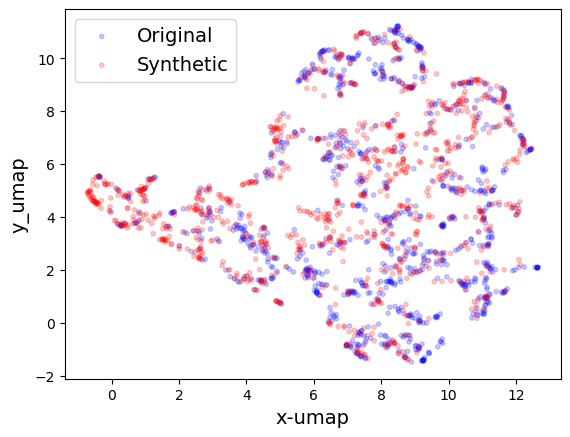

In [77]:
visualization.visualization (unimib_Walking.one_class_train_data, syn_Walking, 'umap', 'unimib_walking_umap')

In [ ]:
syn_Jumping = generate_synthetic_signals(os.path.join(current_path, './checkpoint/DDPM1D_Uncondtional_UNIMIB_Jumping/checkpoint.pt'), 600)

sampling loop time step: 100%|██████████| 1000/1000 [00:54<00:00, 18.51it/s]

torch.Size([600, 3, 144])


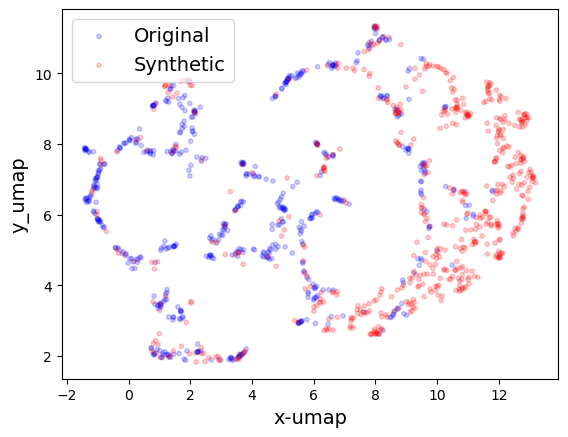

In [78]:
visualization.visualization (unimib_Jumping.one_class_train_data, syn_Jumping, 'umap', 'unimib_jumping_umap')

In [53]:
syn_SittingDown = generate_synthetic_signals(os.path.join(current_path, './checkpoint/DDPM1D_Uncondtional_UNIMIB_SittingDown/checkpoint.pt'), 600)

sampling loop time step: 100%|██████████| 1000/1000 [00:53<00:00, 18.53it/s]

torch.Size([600, 3, 144])


In [51]:
# duplicate real sittingdown samples for 3 times
num_duplicates = 3
duplicated_SittingDown = np.concatenate(([unimib_SittingDown.one_class_train_data] * num_duplicates), axis=0)
print(duplicated_SittingDown.shape)

(504, 3, 144)


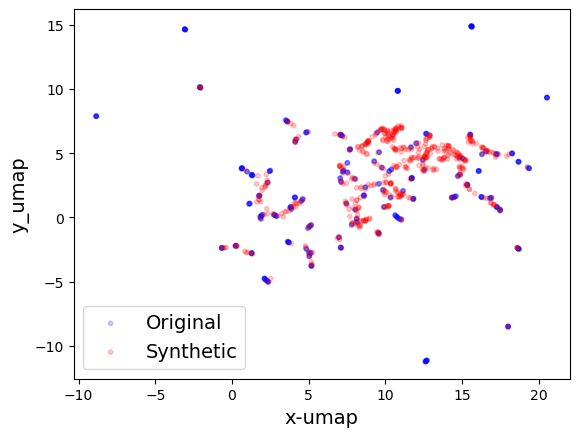

In [79]:
visualization.visualization (duplicated_SittingDown, syn_SittingDown, 'umap', 'unimib_sittingdown_umap')

In [63]:
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [80]:
activities = [
    'Jumping', 'SittingDown', 'StandingUpFS', 'StandingUpFL', 
    'Running', 'GoingUpS', 'GoingDownS', 'LyingDownS'
]

for activity in activities:
    activity_data = getattr(unimib_Walking, f'{activity.lower()}_one_class_train_data')
    print(activity_data)



AttributeError: 'unimib_dataLoader' object has no attribute 'jumping_one_class_train_data'

In [82]:
from datasets import Syn_UNIMIB

In [85]:
class_names = ['StandingUpFS','StandingUpFL','Walking','Running','GoingUpS','Jumping','GoingDownS','LyingDownFS','SittingDown']
real_sample_size = [119,169,1394,1572,737,600,1068,228,168]

In [86]:
dataset = Syn_UNIMIB.Synthetic_UNIMIB(folder_path = '/home/x_l30/Research/Unconditional-Diffusion/synthetic/synthetic_data/', classes = class_names, sample_size = real_sample_size)

Sampled 119 in StandingUpFS class

Sampled 169 in StandingUpFL class

Sampled 1394 in Walking class

Sampled 1572 in Running class

Sampled 737 in GoingUpS class

Sampled 600 in Jumping class

Sampled 1068 in GoingDownS class

Sampled 228 in LyingDownFS class

Sampled 168 in SittingDown class

data shape is (6055, 3, 144) labels shape is (6055,)


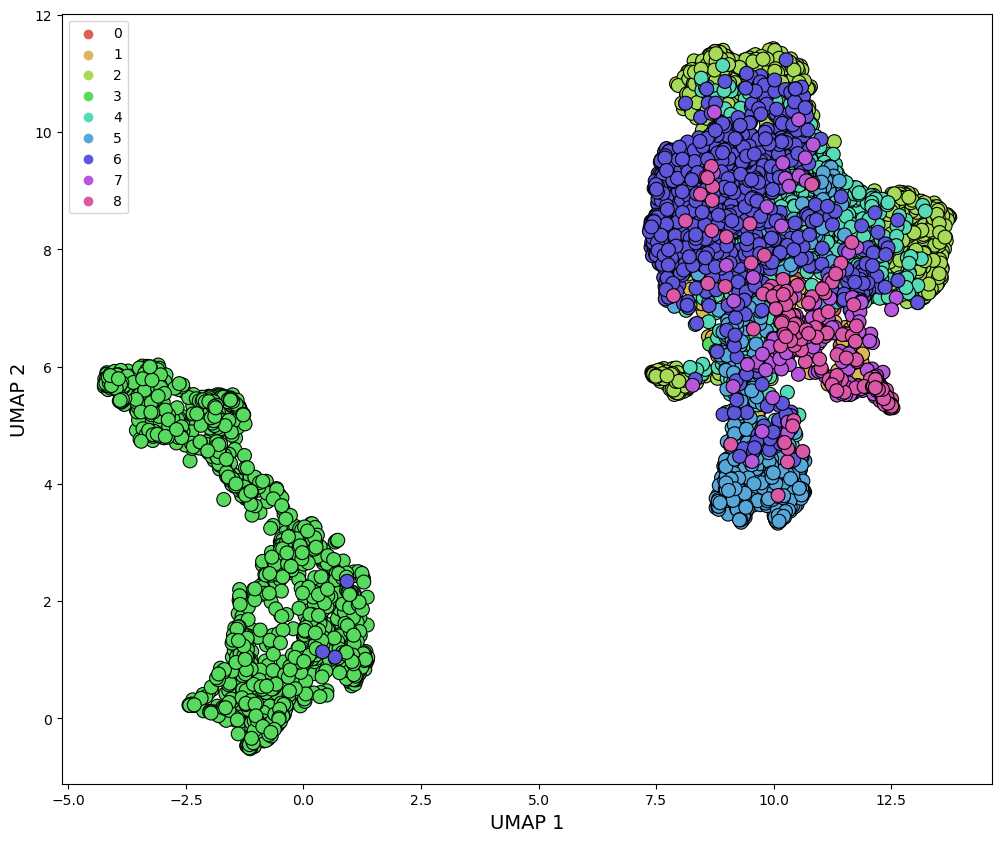

In [89]:
draw_umap(dataset.data, dataset.labels, title='Synthetic UniMiB UMAP Projection')

In [1]:
from datasets import Simulated

/home/x_l30/miniconda3/envs/PyTorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_folder = '/home/x_l30/Research/datasets/simulated/'
signals = Simulated.simulated_data(file_folder = file_folder, class_id = 0).signals

The simulated data shpe is (3950, 1, 512), class id is 0



In [3]:
import numpy as np
from scipy.signal import resample

# Load the dataset
A = signals

# Downsample the signals to 1/4 of the original resolution
B = A[:, :, ::4]

# Supersample the signals back to the original length using scipy.signal.resample
B_supersampled = np.zeros((B.shape[0], B.shape[1], A.shape[2]))
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        B_supersampled[i, j, :] = resample(B[i, j, :], A.shape[2])


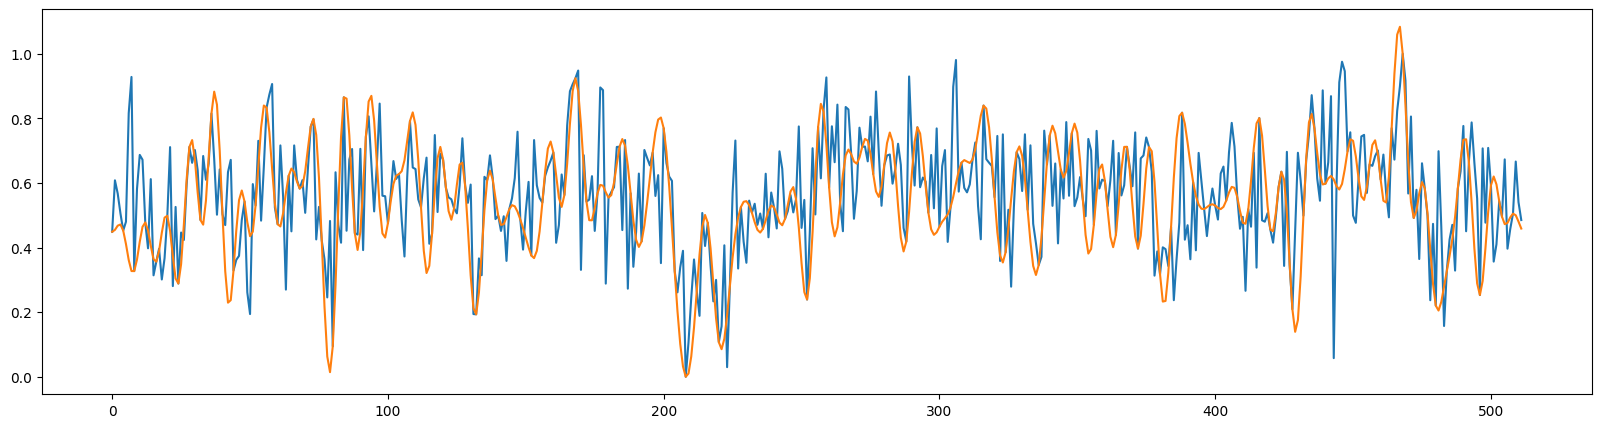

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(A[0][0][:])
plt.plot(B_supersampled[0][0][:])